In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>Import data from csv into dataframe</b>

In [16]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Check the data structure

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266543 entries, 0 to 266542
Data columns (total 9 columns):
lat          266543 non-null float64
lng          266543 non-null float64
desc         266543 non-null object
zip          234049 non-null float64
title        266543 non-null object
timeStamp    266543 non-null object
twp          266448 non-null object
addr         266543 non-null object
e            266543 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 18.3+ MB



<b>Data Wrangling </b>: Befor analysis, it is importnet to ensure there are no incorrect/missing data that could bias our result. It is called sample correction.

In [6]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          32494
title            0
timeStamp        0
twp             95
addr             0
e                0
dtype: int64

<b>Conclusion1:</b> We Need to ignore the record which have not township/zip details. 

Remove null zip record

In [11]:
df_wrang_zip = df[pd.notnull(df['zip'])]
df_wrang_zip.isnull().sum()

lat           0
lng           0
desc          0
zip           0
title         0
timeStamp     0
twp          42
addr          0
e             0
dtype: int64

Remove null twp records 

In [14]:
df_wrang = df_wrang_zip[pd.notnull(df_wrang_zip['twp'])]
df_wrang.isnull().sum() #Create unbias dataset for analysis

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

Data Structure about final dataset after Data Wrangling

In [18]:
df_wrang.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234007 entries, 0 to 266542
Data columns (total 9 columns):
lat          234007 non-null float64
lng          234007 non-null float64
desc         234007 non-null object
zip          234007 non-null float64
title        234007 non-null object
timeStamp    234007 non-null object
twp          234007 non-null object
addr         234007 non-null object
e            234007 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 17.9+ MB


<b>Start Analysis</b>

In [19]:
df_wrang.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1


<b>Top 10 zipcodes for 911 calls</b>

In [25]:
df_wrang['zip'].value_counts().head(10)

19401.0    18395
19464.0    17935
19403.0    13366
19446.0    12828
19406.0     8817
19002.0     8366
19468.0     7859
19046.0     7340
19454.0     7274
19090.0     6998
Name: zip, dtype: int64

<b>Top 4 township (twp) for 911 calls</b>

In [26]:
df_wrang['twp'].value_counts().head(4)

LOWER MERION    19442
ABINGTON        15635
NORRISTOWN      14685
POTTSTOWN       10971
Name: twp, dtype: int64

<b>Unique Count of Emergency(title)</b>

In [27]:
df_wrang['title'].nunique()

128

<b>Create new features: What is the most common Reason for a 911 call based on Reason Column? Which comes second </b>

Create two different field from existing data frame named as department and Reason

In [28]:
df_wrang['Department']=df_wrang['title'].apply(lambda val:val.split(':')[1])
df_wrang['Reason']=df_wrang['title'].apply(lambda val:val.split(':')[0])
df_wrang.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY,EMS


<b>Check Unique Reason</b>

In [35]:
df_wrang['Reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

<b>Check Unique Department</b>

In [36]:
df_wrang['Department'].unique()

array([' BACK PAINS/INJURY', ' DIABETIC EMERGENCY', ' GAS-ODOR/LEAK',
       ' CARDIAC EMERGENCY', ' HEAD INJURY', ' NAUSEA/VOMITING',
       ' RESPIRATORY EMERGENCY', ' SYNCOPAL EPISODE',
       ' VEHICLE ACCIDENT -', ' DIZZINESS', ' VEHICLE ACCIDENT',
       ' DISABLED VEHICLE -', ' APPLIANCE FIRE', ' GENERAL WEAKNESS',
       ' CARBON MONOXIDE DETECTOR', ' UNKNOWN MEDICAL EMERGENCY',
       ' UNRESPONSIVE SUBJECT', ' CVA/STROKE', ' FIRE ALARM',
       ' ROAD OBSTRUCTION -', ' SUBJECT IN PAIN', ' HEMORRHAGING',
       ' FALL VICTIM', ' ASSAULT VICTIM', ' SEIZURES',
       ' MEDICAL ALERT ALARM', ' ABDOMINAL PAINS', ' PUMP DETAIL',
       ' FIRE INVESTIGATION', ' OVERDOSE', ' MATERNITY',
       ' UNCONSCIOUS SUBJECT', ' CHOKING', ' LACERATIONS',
       ' TRASH/DUMPSTER FIRE', ' UNKNOWN TYPE FIRE', ' BUILDING FIRE',
       ' ELECTRICAL FIRE OUTSIDE', ' DEBRIS/FLUIDS ON HIGHWAY',
       ' DEBRIS/FLUIDS ON HIGHWAY -', ' FEVER', ' ALLERGIC REACTION',
       ' FRACTURE', ' RESCUE - GENERAL

<b>Conclusion:</b> There are <u>3 unique reasons</u> and <u>81 unique department</u> 

<b>Most Common Reason for 911 call with visual representation</b>

In [41]:
df_wrang['Reason'].value_counts()[:3]

EMS        121251
Traffic     77771
Fire        34985
Name: Reason, dtype: int64

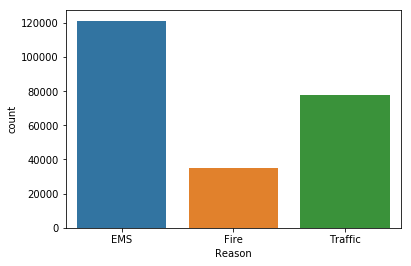

In [40]:
sns.countplot(x=df_wrang['Reason'])

<b>Top 5 department for emergency call with visual representation </b>

In [43]:
df_wrang['Department'].value_counts().head(5)

 VEHICLE ACCIDENT -       53086
 DISABLED VEHICLE -       14775
 FIRE ALARM               14250
 RESPIRATORY EMERGENCY    12719
 FALL VICTIM              12629
Name: Department, dtype: int64

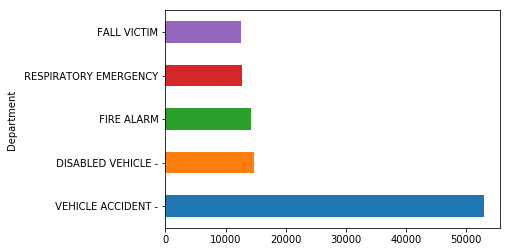

In [49]:
df_wrang.groupby('Department').count().sort_values('e',ascending=0)[:5]['e'].plot(kind='barh')

<b>Top 5 township for emergency calling with visual representation</b>

In [50]:
df_wrang['twp'].value_counts()[:5]

LOWER MERION    19442
ABINGTON        15635
NORRISTOWN      14685
POTTSTOWN       10971
CHELTENHAM      10630
Name: twp, dtype: int64

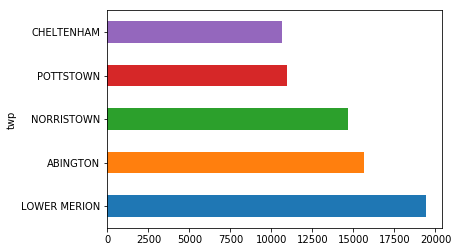

In [51]:
df_wrang.groupby('twp').count().sort_values('e',ascending=0)[:5]['e'].plot(kind='barh')

<b>Top 5 township with reasons via visual representation</b>  

In [55]:
tmplst = list(df_wrang['twp'].value_counts()[:5].index)
tmplst

['LOWER MERION', 'ABINGTON', 'NORRISTOWN', 'POTTSTOWN', 'CHELTENHAM']

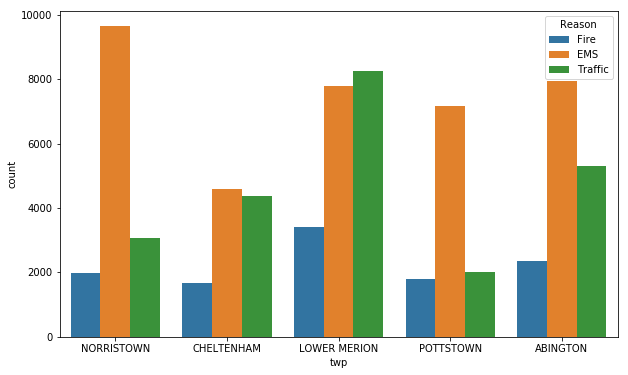

In [60]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_wrang[df_wrang['twp'].apply(lambda x:(True if x in tmplst else False))],x='twp',hue='Reason')

<b>DateTime Analysis for emergency call</b>

Convert string column to Datetime format

In [63]:
df_wrang['timeStamp'] = pd.to_datetime(df_wrang['timeStamp'])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Create new column for Month, Day of week

In [74]:
df_wrang['Month'] = df_wrang['timeStamp'].apply(lambda x:x.month)
df_wrang['DayOfWeek'] = df_wrang['timeStamp'].apply(lambda x:x.dayofweek)
df_wrang.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,12,3
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY,EMS,12,3


Convert Day of Week and month from number to words

In [75]:
daydict = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
df_wrang['DayOfWeek']  = df_wrang['DayOfWeek'].map(daydict)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [76]:
df_wrang.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,12,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,12,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,12,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,12,Thur
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY,EMS,12,Thur


In [79]:
mondict = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df_wrang['Month']=df_wrang['Month'].map(mondict)


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [80]:
df_wrang.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Reason,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,Dec,Thur
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,Dec,Thur
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,Dec,Thur
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,Dec,Thur
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1,HEAD INJURY,EMS,Dec,Thur


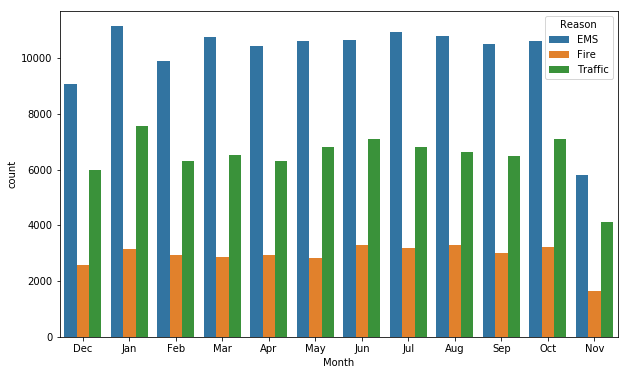

In [86]:
plt.figure(figsize=(10,6))
sns.countplot(x='Month',data=df_wrang,hue='Reason')

<b>Conclusion:<b> June --Barbeque and Holidays time received maximum Fire call

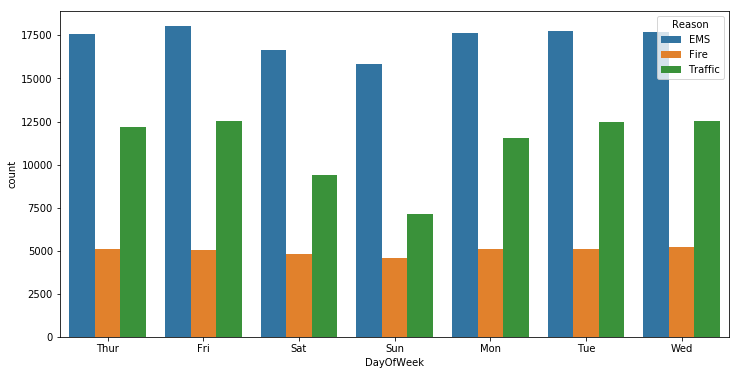

In [90]:
plt.figure(figsize=(12,6))
sns.countplot(x='DayOfWeek',data=df_wrang,hue='Reason')

<b>Conclusion:</b> As expected --Sunday always less traffic